In [125]:
#necessary libraries
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler

In [126]:
wine_file = pd.read_csv('20101539_Umme Abira Azmary_CSE422_11_Assignment04_Summer2024.csv')         #loading the dataset

In [127]:
print(wine_file.shape)            #checking the shape(row x col) of the dataset
print(wine_file.columns)          #checking the features

(6497, 13)
Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')


In [128]:
wine_file.isnull().sum()                        #checking the total number of null values in features.

type                     0
fixed acidity           18
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

# **Removing null values**

In [129]:
#It is observed that the number of null values is relatively small; therefore, removing the rows containing null values is preferable to removing columns. As a result, the .dropna() method should be applied.

print("Before removing null values:", wine_file.shape)
wine_file = wine_file.dropna(axis = 0, subset = ['fixed acidity'])         #removing null rows for the 'fixed acidity' feature.
wine_file = wine_file.dropna(axis = 0, subset = ['volatile acidity'])      #removing null rows for the 'volatile acidity' feature.
wine_file = wine_file.dropna(axis = 0, subset = ['citric acid'])           #removing null rows for the 'critic acid' feature.
wine_file = wine_file.dropna(axis = 0, subset = ['residual sugar'])        #removing null rows for the 'residual sugar' feature.
wine_file = wine_file.dropna(axis = 0, subset = ['chlorides'])             #removing null rows for the 'chlorides' feature.      
wine_file = wine_file.dropna(axis = 0, subset = ['pH'])                    #removing null rows for the 'pH' feature.
wine_file = wine_file.dropna(axis = 0, subset = ['sulphates'])             #removing null rows for the 'sulphates' feature.

print("After removing null values:", wine_file.shape)

wine_file.isnull().sum()

Before removing null values: (6497, 13)
After removing null values: (6455, 13)


type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Removing Duplicates

In [130]:
# Duplicate values can distort the representation of data. These duplicates may skew the data, leading to inaccurate or misleading results in the model
dup = wine_file.duplicated()                       # identifing duplicate rows 
sum_dup = dup.sum()                                #total number of duplicate rows 
print(f"Number of duplicate values present are:",sum_dup)
wine_file2 = wine_file.drop_duplicates()           #removes duplicate rows
print('Duplicates removed!')
dup2 = wine_file2.duplicated()
sum_dup2 = dup2.sum()
print(f"Number of duplicate values present are:",sum_dup2)

Number of duplicate values present are: 1168
Duplicates removed!
Number of duplicate values present are: 0


# Handling Categorical Data


In [131]:
wine_file2['type'].unique()            # retrieves the unique values from the 'type' column

array(['white', 'red'], dtype=object)

In [132]:
# As the retrieval values are Nominal, instead of scaling, encoding methods needs to be applied. This is why, applying one-hot-encoding method. 

wine_file2 = pd.get_dummies(wine_file2, columns=['type'], drop_first=True)  #createing dummy variables for categorical data
wine_file2.head() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,True
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,True
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,True
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,True
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,True


In [133]:
wine_file2['type_white'].unique()             #Instead of having non-ordered 'type' values, the values are now represented with conditions or states.

array([ True, False])

# Feature Scaling

In [134]:
# Seperating the target column from the features as scaling brings all the input features to a common scale so that feature contributes equally to the learning. The target should not be affected by this as it is what the model tries to predict.
target_val = wine_file2['quality']                            
vals = wine_file2.drop(columns=['quality'])
print(vals.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    5287.000000       5287.000000  5287.000000     5287.000000   
mean        7.218659          0.344002     0.318723        5.051854   
std         1.321329          0.168257     0.147062        4.498088   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.240000        1.800000   
50%         7.000000          0.300000     0.310000        2.700000   
75%         7.700000          0.410000     0.400000        7.500000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  5287.000000          5287.000000           5287.000000  5287.000000   
mean      0.056718            30.045773            114.100435     0.994539   
std       0.036921            17.836630             56.814015     0.002968   
min       0.009000             1.000000         

In [135]:
# Observing the dataset, it is vigilant that residual sugar, total sulfur dioxide, chlorides columns contain a significant variance and different scale units. So, scaling these features may help to understand these features more.

sel_cols = ['residual sugar','chlorides', 'total sulfur dioxide', 'free sulfur dioxide']
scaler = StandardScaler()      #as the dataset contains features of different scale with high variance.

vals[sel_cols] = scaler.fit_transform(vals[sel_cols])

print(vals.describe())

wine_file3 = pd.concat([vals, target_val], axis=1)
print(wine_file3.head())


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    5287.000000       5287.000000  5287.000000    5.287000e+03   
mean        7.218659          0.344002     0.318723   -1.290185e-16   
std         1.321329          0.168257     0.147062    1.000095e+00   
min         3.800000          0.080000     0.000000   -9.898150e-01   
25%         6.400000          0.230000     0.240000   -7.230097e-01   
50%         7.000000          0.300000     0.310000   -5.229058e-01   
75%         7.700000          0.410000     0.400000    5.443153e-01   
max        15.900000          1.580000     1.660000    1.350660e+01   

          chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  5.287000e+03         5.287000e+03          5.287000e+03  5287.000000   
mean   1.720247e-16        -8.601236e-17         -8.601236e-17     0.994539   
std    1.000095e+00         1.000095e+00          1.000095e+00     0.002968   
min   -1.292538e+00        -1.628588e+00    

In [136]:
wine_file3.shape

(5287, 13)

# Removing Variables Based on Correlation

In [137]:
#Correlation helps to understand how much a centain feature is similar to other features. If two features display high correlation, they affect the model similarly. So, one of it can be removed while considering it redundant.

corr_matx = wine_file3.corr()                     #applying correlation 
print(corr_matx)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.216798     0.329288   
volatile acidity           0.216798          1.000000    -0.383519   
citric acid                0.329288         -0.383519     1.000000   
residual sugar            -0.107100         -0.164912     0.145944   
chlorides                  0.289797          0.368689     0.055698   
free sulfur dioxide       -0.282221         -0.349949     0.130847   
total sulfur dioxide      -0.329082         -0.401295     0.194064   
density                    0.478687          0.309050     0.095949   
pH                        -0.269373          0.245956    -0.342882   
sulphates                  0.306667          0.227167     0.061695   
alcohol                   -0.103353         -0.066924    -0.006072   
type_white                -0.488183         -0.645886     0.182290   
quality                   -0.078883         -0.266004     0.097477   

                   

<Axes: >

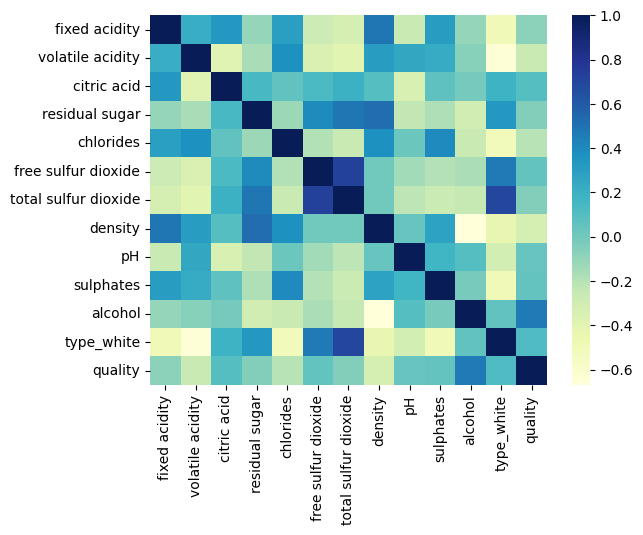

In [138]:
import seaborn as sns

sns.heatmap(corr_matx, cmap = 'YlGnBu')

In [139]:
# Dropping one of the highly correlated values based on the generated heatmap
data_dropped = wine_file3.drop('free sulfur dioxide', axis=1)

# Checking the dataset after removing correlated columns
print(data_dropped.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36        3.479173  -0.317398   
1            6.3              0.30         0.34       -0.767477  -0.209049   
2            8.1              0.28         0.40        0.410913  -0.181961   
3            7.2              0.23         0.32        0.766653   0.034736   
6            6.2              0.32         0.16        0.433146  -0.317398   

   total sulfur dioxide  density    pH  sulphates  alcohol  type_white  \
0              0.983998   1.0010  3.00       0.45      8.8        True   
1              0.315085   0.9940  3.30       0.49      9.5        True   
2             -0.301018   0.9951  3.26       0.44     10.1        True   
3              1.265645   0.9956  3.19       0.40      9.9        True   
6              0.385497   0.9949  3.18       0.47      9.6        True   

   quality  
0        6  
1        6  
2        6  
3        6  
6        6  
